Bibliotecas

In [1]:
import sympy as sp
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from sympy.printing import latex

Simbolos do sympy

In [2]:
t, g, m, l, k = sp.symbols('t g m l k')

u = sp.symbols(r'u', cls=sp.Function)
u = u(t)
u_dot = sp.diff(u, t)
u_ddot = sp.diff(u_dot, t)

Fel = sp.symbols(r'Fel', cls=sp.Function)
Fel = Fel(t)

Posição em x da massa e a força elástica na mola

In [3]:
x = l+u

F = k*u

Equação energia cinética

In [4]:
T1 = sp.Rational(1, 2)*m*sp.diff(x, t)**2

T = T1

T

m*Derivative(u(t), t)**2/2

Equação energia potencial elástica

In [5]:
U1 = sp.Rational(1, 2)*k*(u**2)

U = U1

U

k*u(t)**2/2

Equação de Lagrange

In [6]:
L = T - U

L

-k*u(t)**2/2 + m*Derivative(u(t), t)**2/2

EDO u(t)

In [7]:
eq = sp.diff(L, u) - sp.diff(sp.diff(L, u_dot), t)
EDOu = sp.simplify(eq)

EDOu

-k*u(t) - m*Derivative(u(t), (t, 2))

Solução da EDO

In [8]:
sols = sp.solve(EDOu, u_ddot)[0]

sols

-k*u(t)/m

Transforma as equações simbólicas em equações solucionáveis

In [9]:
dz1dt_f = sp.lambdify((u, u_dot, g, l, m, k), sols)
dthetadt_f = sp.lambdify(u_dot, u_dot)
Ep = sp.lambdify((u, g, l, m, k), U)
Ec = sp.lambdify((u, u_dot, m, l, k), T)
Felastica = sp.lambdify((k, u), F)

Função que será usada para retornar a posição e velocidade no intervalo de tempo proposto pela solução no método ODEINT

In [10]:
def dSdt(S, t, g, l, m, k):
    u, ud = S
    return [dthetadt_f(ud),
            dz1dt_f(u, ud, g, l, m, k)]

Define as condições iniciais e calcula a solução da EDO

In [11]:
tempo_simulacao = 10  # 10 s
passo = 1000  # 0.001 s
t = np.linspace(0, tempo_simulacao, passo+1)
g = 9.81
l = 1
m = 1
k = 0.5
u0 = 0.5
du0 = 0

sol = odeint(dSdt, y0=[u0, du0], t=t, args=(g, l, m, k))

Posição e Velocidade da massa

In [12]:
upos = sol.T[0]
udot = sol.T[1]

Calcula a posição real com base no comprimento original da mola, como não há movimento na direção 'y' sua posição é sempre zero

In [13]:
def pos(t, up, l):
    x1 = l+up
    return x1


xpos = pos(t, upos, l)
ypos = np.zeros(len(xpos))

Cálcula as energias do sistema

In [14]:
Cine = Ec(upos, udot, m, l, k)
Pot = Ep(upos, g, l, m, k)
Etotal = Cine + Pot

Plota a variação das energias

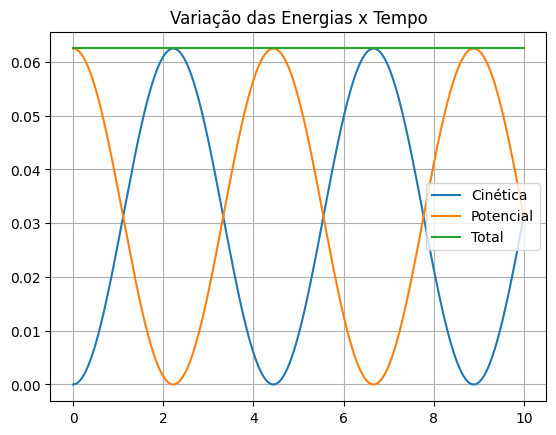

In [15]:
plt.title('Variação das Energias x Tempo')
plt.plot(t, Cine, label='Cinética')
plt.plot(t, Pot, label='Potencial')
plt.plot(t, Etotal, label='Total')
plt.legend()
plt.grid()
plt.show()

Plota a função u(t)

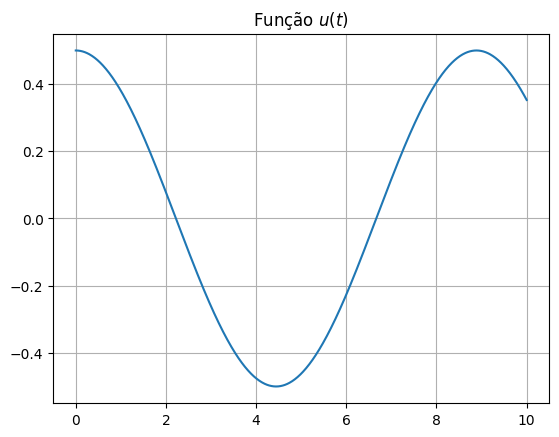

In [16]:
plt.title(f'Função ${latex(u)}$')
plt.plot(t, upos)
plt.grid()
plt.show()

Plota a função du(t)/dt

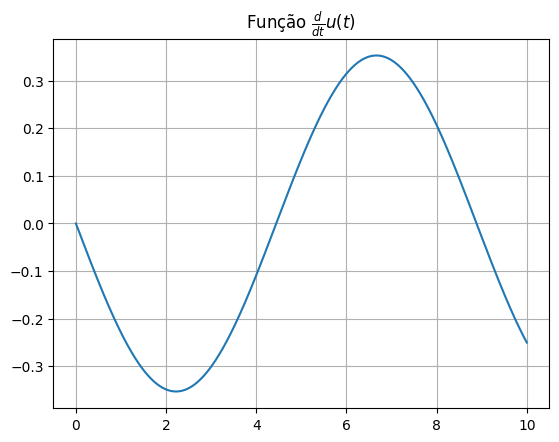

In [17]:
plt.title(f'Função ${latex(u_dot)}$')
plt.plot(t, udot)
plt.grid()
plt.show()

Plota a fase u(t)xdu(t)/dt

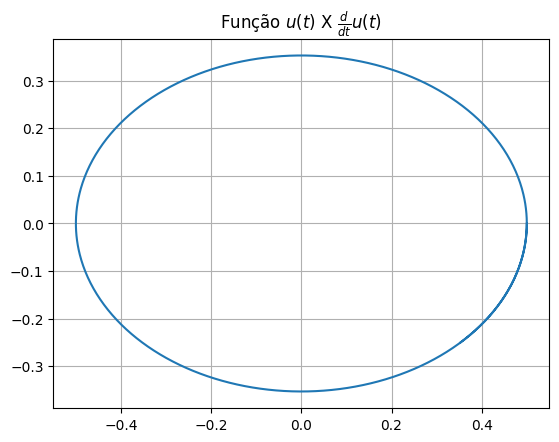

In [18]:
plt.title(f'Função ${latex(u)}$ X ${latex(u_dot)}$')
plt.plot(upos, udot)
plt.grid()
plt.show()

Plota a posição da massa em 'x'

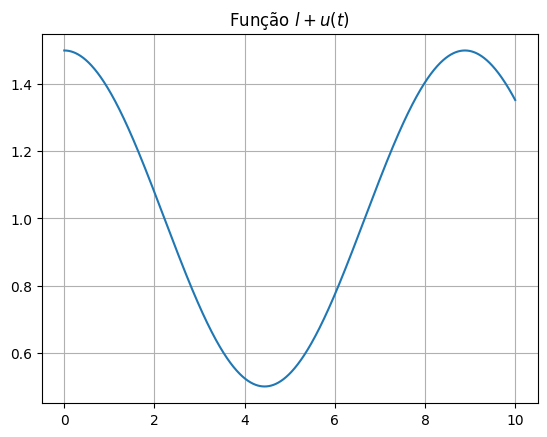

In [19]:
plt.title(f'Função ${latex(x)}$')
plt.plot(t, xpos)
plt.grid()
plt.show()

Plota a variação da força elástica devido ao movimento da massa

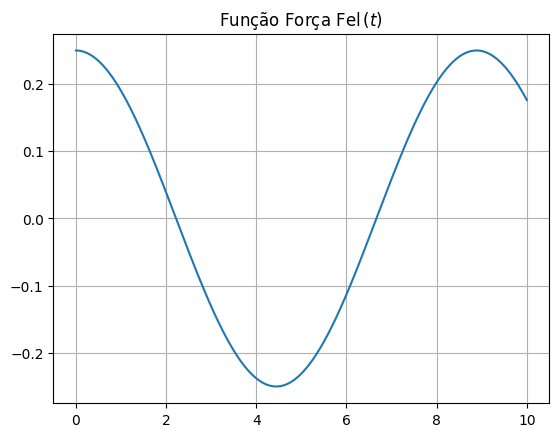

In [20]:
F_elastica = Felastica(upos, k)

plt.title(f'Função Força ${latex(Fel)}$')
plt.plot(t, F_elastica)
plt.grid()
plt.show()

Cria a animação do sistema

In [21]:
def animate(i):
    ln.set_data([0, xpos[i]], [0, ypos[i]])
    cur.set_data(xpos[:i+1], ypos[:i+1])


fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_xlim((min(xpos)-1), (max(xpos)+0.5))
ax.set_ylim((min(ypos)-0.5), (max(ypos)+0.5))
ax.grid()
ln, = ax.plot([], [], 'bo--', lw=2, markersize=8)
cur, = ax.plot(xpos[0], ypos[0], 'black', lw=1)

ani = animation.FuncAnimation(fig, animate, frames=passo, interval=10)
ani.save('massa_mola.gif', writer='pillow', fps=25)